# Feature Selection by <font color=red>Variance Threshold</font> on Boston House Price<br/> (Regression Model)

In this program we continue work on __regression model__. We've already a __baselined__ taking __all the features__ present in the original dataset(<a href='http://localhost:8888/notebooks/Exercises/Ex_MachineLearning/Pluralsight/Reducing%20Complexity%20in%20data/Baseline%20Regression%20Model.ipynb'>Baseline Regression Model</a>). Here, we apply __Variance Thresholding__ to fetch only the __significant features__ from the complete collection; train and test to see if there is any improvement.

<img src='../Preparing Data for Machine Learning/Data/Filter Methods.png' width=500/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
boston_df = pd.read_csv('Data/boston.csv')
boston_df.head(10)

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
boston_df.shape

(506, 13)

In [4]:
X = boston_df.drop('Median Home Value', axis=1)
Y = boston_df['Median Home Value']

In [5]:
# Get variance of each feature
X.var(axis=0)

crime rate                            73.986578
residential land zone                543.936814
business acres                        47.064442
Charles River                          0.064513
nitric oxides                          0.013428
number of rooms                        0.493671
age                                  792.358399
distances to employment centres        4.434015
accessibility to highways             75.816366
property-tax                       28404.759488
pupil-teacher ratio                    4.686989
lower income levels                 8334.752263
dtype: float64

Observations:
- Features having <font color=red>__high variance__</font> are __crime rate, residential land zone, business acres, age, property-tax, accessibility to highways, lower income levels__
- Features having <font color=red>__low variance__</font> are __Charles River, nitric oxides, number of rooms, distances to employment centres, pupil-teacher ratio__

We've two choices in picking up features imposing threshold value viz.,
- using correlation: bringing all values to same scale and apply threshold
- using covariance: applying threshold on the variances without bringing them to scale

Let us proceed with the unscaled covariance magnitude - __We remove features below the threshold variance__:

__Anandachetan added the following graphs to visualize the distribution (spread) of features:__
- taking the data as it is
- scaling the data
- imposing x-axis limits to focus on the central portion of distribution leaving the tails at both ends

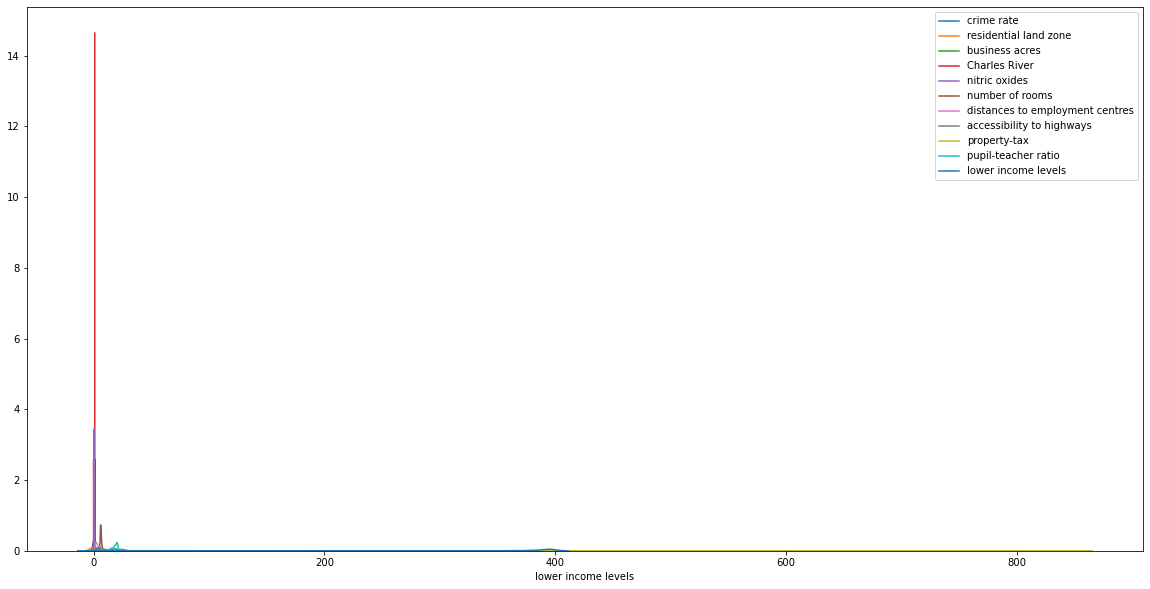

In [6]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 10))

sns.distplot(boston_df['crime rate'], label='crime rate', hist=False)
sns.distplot(boston_df['residential land zone'], label='residential land zone', hist=False)
sns.distplot(boston_df['business acres'], label='business acres', hist=False)
sns.distplot(boston_df['Charles River'], label='Charles River', hist=False)
sns.distplot(boston_df['nitric oxides'], label='nitric oxides', hist=False)
sns.distplot(boston_df['number of rooms'], label='number of rooms', hist=False)
sns.distplot(boston_df['distances to employment centres'], label='distances to employment centres', hist=False)
sns.distplot(boston_df['accessibility to highways'], label='accessibility to highways', hist=False)
sns.distplot(boston_df['property-tax'], label='property-tax', hist=False)
sns.distplot(boston_df['pupil-teacher ratio'], label='pupil-teacher ratio', hist=False)
sns.distplot(boston_df['lower income levels'], label='lower income levels', hist=False)

Observations:
- We could not see the distribtions clearly due to varying scales of features
- Let us scale the features and then visualize

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_boston_df = pd.DataFrame(scaler.fit_transform(boston_df), columns=boston_df.columns)
new_boston_df

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


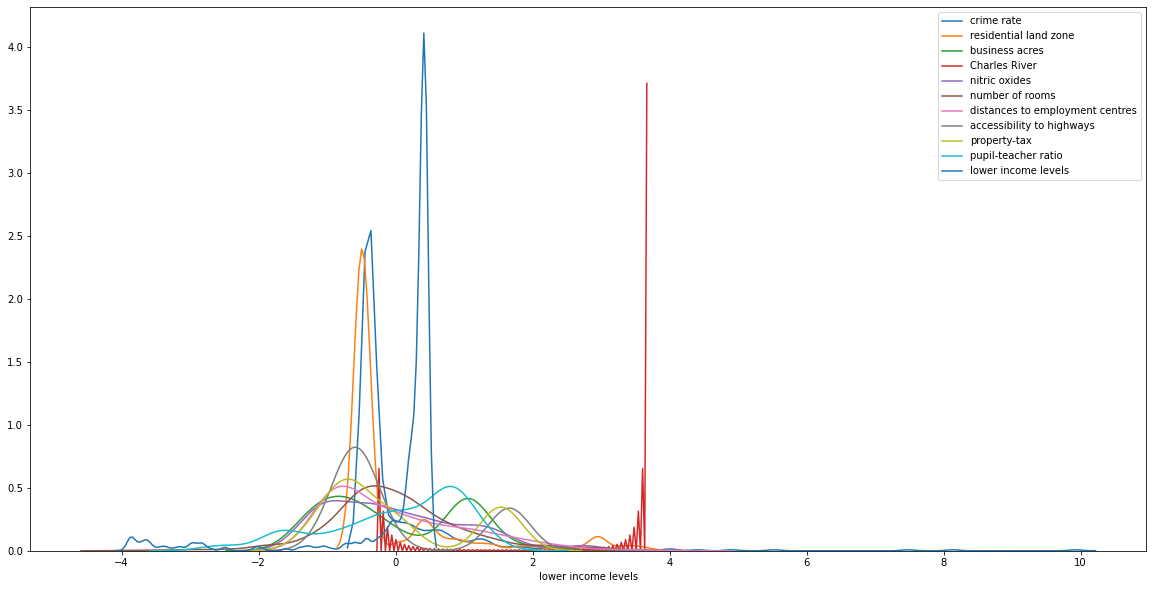

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.distplot(new_boston_df['crime rate'], label='crime rate', hist=False)
sns.distplot(new_boston_df['residential land zone'], label='residential land zone', hist=False)
sns.distplot(new_boston_df['business acres'], label='business acres', hist=False)
sns.distplot(new_boston_df['Charles River'], label='Charles River', hist=False)
sns.distplot(new_boston_df['nitric oxides'], label='nitric oxides', hist=False)
sns.distplot(new_boston_df['number of rooms'], label='number of rooms', hist=False)
sns.distplot(new_boston_df['distances to employment centres'], label='distances to employment centres', hist=False)
sns.distplot(new_boston_df['accessibility to highways'], label='accessibility to highways', hist=False)
sns.distplot(new_boston_df['property-tax'], label='property-tax', hist=False)
sns.distplot(new_boston_df['pupil-teacher ratio'], label='pupil-teacher ratio', hist=False)
sns.distplot(new_boston_df['lower income levels'], label='lower income levels', hist=False)

Observations:
- We could see the distributions but to focus on the central portion, let us cut x-axis tails

(-2.0, 4.0)

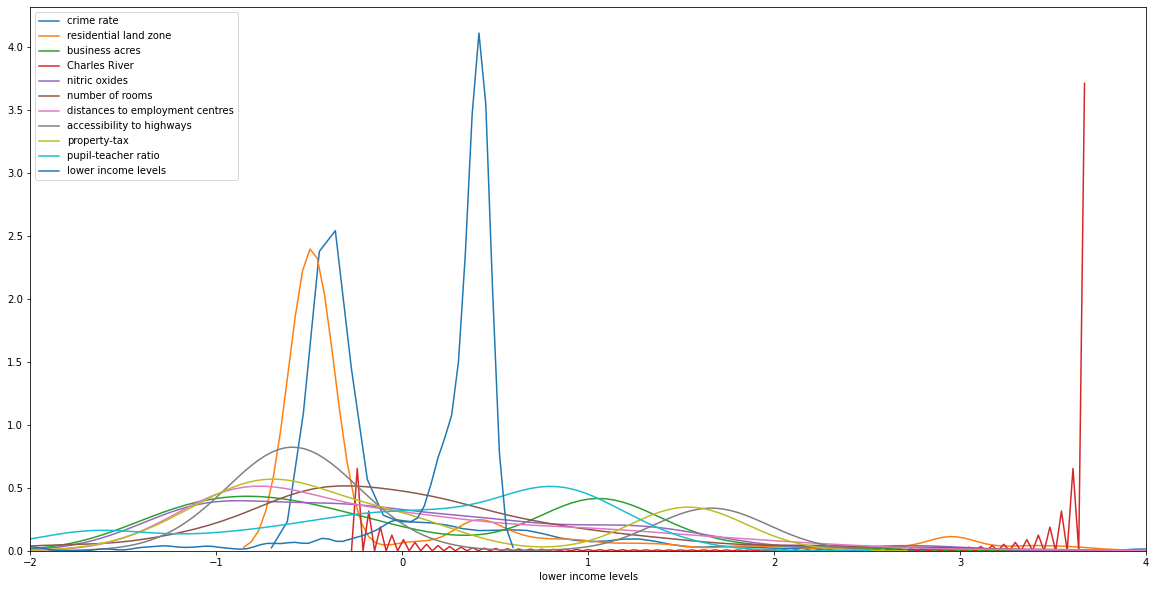

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.distplot(new_boston_df['crime rate'], label='crime rate', hist=False)
sns.distplot(new_boston_df['residential land zone'], label='residential land zone', hist=False)
sns.distplot(new_boston_df['business acres'], label='business acres', hist=False)
sns.distplot(new_boston_df['Charles River'], label='Charles River', hist=False)
sns.distplot(new_boston_df['nitric oxides'], label='nitric oxides', hist=False)
sns.distplot(new_boston_df['number of rooms'], label='number of rooms', hist=False)
sns.distplot(new_boston_df['distances to employment centres'], label='distances to employment centres', hist=False)
sns.distplot(new_boston_df['accessibility to highways'], label='accessibility to highways', hist=False)
sns.distplot(new_boston_df['property-tax'], label='property-tax', hist=False)
sns.distplot(new_boston_df['pupil-teacher ratio'], label='pupil-teacher ratio', hist=False)
sns.distplot(new_boston_df['lower income levels'], label='lower income levels', hist=False)

plt.xlim(-2, 4)

<font color=red>__Filter By Threshold__</font>

In [10]:
from sklearn.feature_selection import VarianceThreshold

select_features = VarianceThreshold(threshold=8.0)

In [11]:
X_new = select_features.fit_transform(X)

In [12]:
X_new.shape

(506, 7)

In [13]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2,3,4,5,6
0,0.00632,18.0,2.31,65.2,1.0,296.0,396.90
1,0.02731,0.0,7.07,78.9,2.0,242.0,396.90
2,0.02729,0.0,7.07,61.1,2.0,242.0,392.83
3,0.03237,0.0,2.18,45.8,3.0,222.0,394.63
4,0.06905,0.0,2.18,54.2,3.0,222.0,396.90


In [14]:
var_df = pd.DataFrame({'feature names': list(X),
                       'variances': select_features.variances_})
var_df

,feature names,variances
0,crime rate,73.840360
1,residential land zone,542.861840
2,business acres,46.971430
3,Charles River,0.064385
4,nitric oxides,0.013401
5,number of rooms,0.492695
6,age,790.792473
7,distances to employment centres,4.425252
8,accessibility to highways,75.666531
9,property-tax,28348.623600


In [15]:
selected_features = []

for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):
        if (X_new.iloc[:, i].equals (X.iloc[:, j])):
            selected_features.append(X.columns[j])
selected_features

['crime rate',
 'residential land zone',
 'business acres',
 'age',
 'accessibility to highways',
 'property-tax',
 'lower income levels']

In [16]:
rejected_features = set(list(X)) - set(selected_features)
rejected_features

{'Charles River',
 'distances to employment centres',
 'nitric oxides',
 'number of rooms',
 'pupil-teacher ratio'}

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)

In [18]:
x_train.shape, y_train.shape

((404, 7), (404,))

In [19]:
x_test.shape, y_test.shape

((102, 7), (102,))

Let us use StatsModel's analytical regression technique __Ordianry Least Squares Regression(OLS)__ 

In [20]:
x_train_with_const = sm.add_constant(x_train)
x_train_with_const

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,0,1,2,3,4,5,6
285,1.0,0.01096,55.0,2.25,31.9,1.0,300.0,394.72
91,1.0,0.03932,0.0,3.41,73.9,2.0,270.0,393.55
444,1.0,12.80230,0.0,18.10,96.6,24.0,666.0,240.52
93,1.0,0.02875,28.0,15.04,28.9,4.0,270.0,396.33
345,1.0,0.03113,0.0,4.39,48.5,3.0,352.0,385.64
...,...,...,...,...,...,...,...,...
293,1.0,0.08265,0.0,13.92,18.4,4.0,289.0,396.90
197,1.0,0.04666,80.0,1.52,36.6,2.0,329.0,354.31
18,1.0,0.80271,0.0,8.14,36.6,4.0,307.0,288.99
182,1.0,0.09103,0.0,2.46,92.2,3.0,193.0,394.12


In [21]:
model = sm.OLS(y_train, x_train_with_const)

In [22]:
result = model.fit()

In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Median Home Value   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     61.25
Date:                Thu, 14 May 2020   Prob (F-statistic):           2.75e-59
Time:                        15:22:21   Log-Likelihood:                -1226.7
No. Observations:                 404   AIC:                             2469.
Df Residuals:                     396   BIC:                             2501.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2328      1.773      2.952      0.0

Let us fit Scikit's Machine Learning __Linear Regression__ model

In [24]:
reg_model = LinearRegression().fit(x_train, y_train)

In [25]:
print('Training score = ', reg_model.score(x_train, y_train))

Training score =  0.5198370932633001


Observations:
- The score is almost same with what we've got in the stats model

In [26]:
y_pred = reg_model.predict(x_test)

In [27]:
print('Testing score = ', r2_score(y_test, y_pred))

Testing score =  0.33462046695881364


Observations:
- The testing score is __better__ than training score __with less number of features__ than the __original baseline__.